In [2]:
from main import * 

# %load_ext autoreload
# %autoreload 2

filename = "feature_df_py.xlsx"  # df of files and factors

color_dict = {"pAD":"orange","Somatic":"blue","WASH":"lightsteelblue", "PRE":"black", "CONTROL": 'grey', "TCB2":'green', "DMT":"teal", "PSIL":"orange", "LSD":"purple", "MDL":'blue', 'I_display':'cornflowerblue'} 
saveColors(filename, color_dict) #cache colors relative to filename



COLORS {'pAD': 'orange', 'Somatic': 'blue', 'WASH': 'lightsteelblue', 'PRE': 'black', 'CONTROL': 'grey', 'TCB2': 'green', 'DMT': 'teal', 'PSIL': 'orange', 'LSD': 'purple', 'MDL': 'blue', 'I_display': 'cornflowerblue'} SAVED TO /Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py SUBCACHE


In [2]:
# create cell dict with cell_type > cell_subtype > cell_id
# prints list of : cell_types, cell_subtype, drug and data_type
cell_dict = checkFeatureDF(filename, from_scratch=True) 


cell types : ['L6b_CTG' 'L5b_SIM' 'L5a_TLX' 'L6b_DRD' 'L6b_5HT2A' 'L5b_CBL' 'L5a_CBL'
 'L6b_-DRD' 'L6_HUM']
 drugs applied : ['PRE' 'DMT' 'PSIL' 'LSD' 'TCB2' 'MDL' 'CONTROL' 'WASH' 'TCB2_CNQX_AP5'
 'CONTROL_CNQX_AP5' 'LSD_CNQX_AP5' 'PSIL_CNQX_AP5']
cell subtypes : ['None' 'NP' 'PT' 'INT' 'INT_PT' 'NP_POM' 'PT_POM' 'NP_L1']
data types : ['FP' 'AP' 'FP_AP' 'pAD']
BUILDING "cell_type_dict"
CELL TYPE DICT {'L6b_CTG': {'None': ['CTG210406a', 'CTG210427a', 'CTG210429a', 'CTG210507a', 'CTG210507b', 'CTG210513a', 'CTG210516a', 'CTG210517a', 'CTG210517b', 'CTG210517c', 'CTG210607c', 'CTG210608a', 'CTG210608b', 'CTG210608c', 'CTG210608d'], 'NP': ['CTG230131a', 'CTG230131b', 'CTG230201a', 'CTG230201b', 'CTG230201c', 'CTG230207a', 'CTG230207b', 'CTG230207c', 'CTG230208a', 'CTG230208b', 'CTG230208c', 'CTG230216a', 'CTG230216b', 'CTG230216c', 'CTG230216d', 'CTG230220a', 'CTG230220b', 'CTG230220c', 'CTG230222a', 'CTG230222b', 'CTG230721b', 'CTG230828b'], 'PT': ['CTG230721c'], 'PT_POM': ['CTG230828a']

        folder_file     cell_id data_type          drug  conc_uM  \
1809  JJB230911/t31  DRD230911d        AP  LSD_CNQX_AP5     0.18   

      replication_no  application_order drug_in drug_out       I_set  \
1809               1                  1      22       35  short step   

      R_series  R_tip cell_type cell_subtype sex  offset  weight P_age  \
1809       NaN    6.0   L6b_DRD           PT   F     0.0    16.0    41   

     Bistable  pAD  
1809      NaN  NaN  


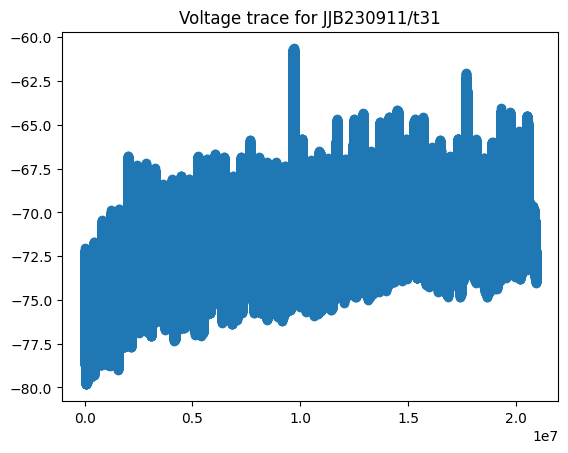

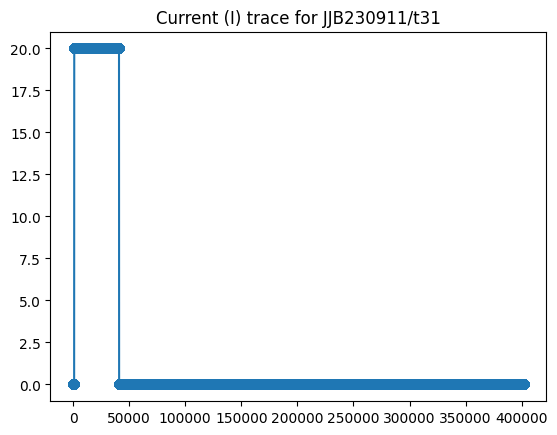

In [3]:
#check a specific file I and V plot
quick_plot_file(filename, 'JJB230911/t31')


In [4]:
#get the expanded feature df for a single cell type 

cell_type_expanded_df = getorbuildExpandedDF(filename, 'L5a_TLX_expanded_df', buildExpandedDF_cell_type, cell_type='L5a_TLX', from_scratch=False)

cell_type_expanded_df[cell_type_expanded_df['cell_id']== 'TLX210328a'][['cell_id', 'data_type','WASH_Somatic_AP_locs', 'APP_pAD_AP_locs', 'AP_height']]
# cell_type_expanded_df
  #FIX column order 


GETTING "L5a_TLX_expanded_df" FROM "feature_df_py" CACHE


,cell_id,data_type,WASH_Somatic_AP_locs,APP_pAD_AP_locs,AP_height
91,TLX210328a,FP,NaN,NaN,"[73.785934, 76.04438, 75.64219, 75.85875]"
92,TLX210328a,FP,NaN,NaN,"[72.54844, 72.486565, 72.23907, 73.04344, 71.8..."
93,TLX210328a,FP,NaN,NaN,"[69.88782, 69.609375, 69.98063, 69.73312, 69.6..."
94,TLX210328a,AP,[48792],[],NaN
95,TLX210328a,FP,NaN,NaN,"[76.26094, 76.755936, 75.20906, 75.20906, 74.7..."
96,TLX210328a,FP,NaN,NaN,"[76.29187, 75.54938, 76.972496, 75.58031, 75.1..."


In [5]:
# get expanded  df for entire feature df 
expanded_df = getorbuildExpandedDF(filename, 'expanded_df', buildExpandedDF, from_scratch=True)
# subselectDf(expanded_df, {'cell_type':'L5a_TLX'})

#show APP traces without AP's
# expanded_df[expanded_df['AP_locs'].apply(lambda x: isinstance(x, np.ndarray) and len(x) == 0 if isinstance(x, np.ndarray) else False)]

GETTING "expanded_df" FROM "feature_df_py" CACHE


,cell_id,data_type,WASH_Somatic_AP_locs,APP_pAD_AP_locs,AP_height
91,TLX210328a,FP,NaN,NaN,"[73.785934, 76.04438, 75.64219, 75.85875]"
92,TLX210328a,FP,NaN,NaN,"[72.54844, 72.486565, 72.23907, 73.04344, 71.8..."
93,TLX210328a,FP,NaN,NaN,"[69.88782, 69.609375, 69.98063, 69.73312, 69.6..."
94,TLX210328a,AP,[48792],[],NaN
95,TLX210328a,FP,NaN,NaN,"[76.26094, 76.755936, 75.20906, 75.20906, 74.7..."
96,TLX210328a,FP,NaN,NaN,"[76.29187, 75.54938, 76.972496, 75.58031, 75.1..."


In [ ]:
#APPLICATION TRACE PLOTTING
#FIX ME: allow for second aplication plotting also 


# getorbuildApplicationFig(filename, 'SIM230713a', from_scratch=True) #cell_df_or_id

import numpy as np
#loop over all AP files and build from scratch
# loopBuildAplicationFigs(filename) #FIX ME: run out of active memeory

# plot_all_FI_curves(feature_df,  color_dict)  # generates PDF with all FI curves for single cell labed with drug and aplication order #### MAKE HZ NOT APs per sweep also isnt it in pA not nA??
# plot_FI_AP_curves(feature_df) #generated PDF with FI-AP for each cell

def APP_loop_plotter(filename_or_df, getorbuild_plotter_function, from_scratch=True ):

    if not isinstance(filename_or_df, pd.DataFrame):
        expanded_df = getorbuildExpandedDF(filename_or_df, 'feature_df_expanded', buildExpandedDF, from_scratch=False) #get df
    else:
        filename_or_df=expanded_df
    
    for cell_id in expanded_df['cell_id'].unique(): #loop over all unique cell_ids 
        cell_df = getCellDF(expanded_df, cell_id, data_type = 'AP')
        getorbuild_plotter_function(filename, cell_df, from_scratch=from_scratch) #check use for second aplications in AP_MEan ect

    return

APP_loop_plotter(filename, getorbuildApplicationFig, from_scratch=True)

In [7]:
#Action Potential Investigation (AP)

#EXAMPLE USE
# getorbuildAP_MeanFig(filename, 'TLX210328a', from_scratch=True) #cell_id_or_cell_df
# getorbuildAP_HistogramFig(filename, cell_id_or_cell_df, from_scratch=True)
# getorbuildAP_PhasePlotFig(filename, cell_id_or_cell_df, from_scratch=True)
# getorbuildAP_PCAFig(filename, cell_id_or_cell_df, from_scratch=None

cell_type_expanded_df = getorbuildExpandedDF(filename, 'L6b_DRD_feature_df_expanded', buildExpandedDF_cell_type, cell_type='L6b_DRD', from_scratch=False)



cell_df = getCellDF(cell_type_expanded_df, 'DRD210310a', data_type='AP')

getorbuildAP_MeanFig(filename, cell_df, from_scratch=True) 
getorbuildAP_HistogramFig(filename, cell_df, from_scratch=True) 
getorbuildAP_PhasePlotFig(filename, cell_df, from_scratch=True) 
getorbuildAP_PCAFig(filename, cell_df, from_scratch=True) 
getorbuildApplicationFig(filename, 'TLX230416a', from_scratch=True)




GETTING "L6b_DRD_feature_df_expanded" FROM "feature_df_py" CACHE
BUILDING "DRD210310a Mean APs Figure"


TypeError: cannot unpack non-iterable NoneType object

In [6]:
#this function is dependant on values from feature_df_expanded
#this will generate all plots that could also be gotten by getorbuildHistogram(finename, identifier) #FIX ME
loopCombinations_stats(filename)
#RuntimeWarning: Mean of empty slice. #FIX ME

GETTING "feature_df_expanded" FROM "feature_df_py" CACHE


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.v

Insufficient data for L5a_CBLforFiring_(Hz)
Insufficient data for L5a_CBLforVoltage_Threshold_(mV)
Insufficient data for L5a_CBLfor AP_Height_(mV)
Insufficient data for L5a_CBLforAP_slope_(V_s^-1)
Insufficient data for L5a_CBLforAP_width_(s) 
Insufficient data for L5a_CBLforAP_latency_(ms)
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

PRE vs. CONTROL: Custom statistical test, P_val:4.168e-02
PRE vs. TCB2: Custom statistical test, P_val:4.161e-02
PRE vs. LSD: Custom statistical test, P_val:1.977e-03
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L5a_TLX_Firing_(Hz).svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L5a_TLX_Firing_(Hz).png
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

PR

/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/seaborn/categorical.py:1402: UserWarning: You passed a edgecolor/edgecolors ('#4c4c4c') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(cat_pos, swarm_data, s=s, **kws)


SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L5a_TLX_pAD_vs_somatic_APs_LSD.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L5a_TLX_pAD_vs_somatic_APs_LSD.png
Insuficient data for L5a_TLX with MDL application 
Insuficient data for L5a_TLX with PSIL application 


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/seaborn/categorical.py:1402: UserWarning: You passed a edgecolor/edgecolors ('#4c4c4c') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(cat_pos, swarm_data, s=s, **kws)


SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L5a_TLX_pAD_vs_somatic_APs_TCB2.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L5a_TLX_pAD_vs_somatic_APs_TCB2.png
Insuficient data for L5b_CBL with TCB2 application 
Insuficient data for L5b_SIM with CONTROL application 
Insuficient data for L5b_SIM with DMT application 


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/seaborn/categorical.py:1402: UserWarning: You passed a edgecolor/edgecolors ('#4c4c4c') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(cat_pos, swarm_data, s=s, **kws)


SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L5b_SIM_pAD_vs_somatic_APs_LSD.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L5b_SIM_pAD_vs_somatic_APs_LSD.png
Insuficient data for L5b_SIM with PSIL application 


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/seaborn/categorical.py:1402: UserWarning: You passed a edgecolor/edgecolors ('#4c4c4c') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(cat_pos, swarm_data, s=s, **kws)


SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L5b_SIM_pAD_vs_somatic_APs_TCB2.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L5b_SIM_pAD_vs_somatic_APs_TCB2.png
Insuficient data for L5b_int with TCB2 application 
Insuficient data for L6b _DRD with CONTROL application 
Insuficient data for L6b _DRD with LSD application 
Insuficient data for L6b_ with TCB2 application 
Insuficient data for L6b_5HT_ with MDL application 
Insuficient data for L6b_5HT_ with TCB2 application 
Insuficient data for L6b_CTG with CONTROL application 
Insuficient data for L6b_CTG with LSD application 
Insuficient data for L6b_CTG with MDL application 


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/seaborn/categorical.py:1402: UserWarning: You passed a edgecolor/edgecolors ('#4c4c4c') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(cat_pos, swarm_data, s=s, **kws)


SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L6b_CTG_pAD_vs_somatic_APs_TCB2.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L6b_CTG_pAD_vs_somatic_APs_TCB2.png


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/seaborn/categorical.py:1402: UserWarning: You passed a edgecolor/edgecolors ('#4c4c4c') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(cat_pos, swarm_data, s=s, **kws)


SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L6b_DRD_pAD_vs_somatic_APs_CONTROL.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L6b_DRD_pAD_vs_somatic_APs_CONTROL.png


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/seaborn/categorical.py:1402: UserWarning: You passed a edgecolor/edgecolors ('#4c4c4c') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(cat_pos, swarm_data, s=s, **kws)


SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L6b_DRD_pAD_vs_somatic_APs_DMT.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L6b_DRD_pAD_vs_somatic_APs_DMT.png


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/seaborn/categorical.py:1402: UserWarning: You passed a edgecolor/edgecolors ('#4c4c4c') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(cat_pos, swarm_data, s=s, **kws)


SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L6b_DRD_pAD_vs_somatic_APs_LSD.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L6b_DRD_pAD_vs_somatic_APs_LSD.png


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/seaborn/categorical.py:1402: UserWarning: You passed a edgecolor/edgecolors ('#4c4c4c') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(cat_pos, swarm_data, s=s, **kws)


SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L6b_DRD_pAD_vs_somatic_APs_MDL.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L6b_DRD_pAD_vs_somatic_APs_MDL.png
Insuficient data for L6b_DRD with PSIL application 


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/seaborn/categorical.py:1402: UserWarning: You passed a edgecolor/edgecolors ('#4c4c4c') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(cat_pos, swarm_data, s=s, **kws)
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L6b_DRD_pAD_vs_somatic_APs_TCB2.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L6b_DRD_pAD_vs_somatic_APs_TCB2.png


,folder_file,cell_id,data_type,drug,replication_no,application_order,drug_in,drug_out,I_set,R_series,...,mean_AP_slope_file,mean_AP_width_file,mean_AP_latency_file,max_firing_cell_drug,voltage_threshold_cell_drug,AP_height_cell_drug,AP_slope_cell_drug,AP_width_cell_drug,AP_latency_cell_drug,first_drug_AP
906,JJB230509/t11,CBL230509b,FP,PRE,1,0,NaN,NaN,NaN,47.0,...,82.629766,704.375000,0.975000,20.688653,-35.720416,78.239833,86.914814,778.40119,0.904365,TCB2
907,JJB230509/t12,CBL230509b,FP,PRE,2,0,NaN,NaN,NaN,44.0,...,90.947657,841.000000,0.866667,20.688653,-35.720416,78.239833,86.914814,778.40119,0.904365,TCB2
908,JJB230509/t13,CBL230509b,FP,PRE,3,0,NaN,NaN,NaN,44.0,...,87.167019,789.828571,0.871429,20.688653,-35.720416,78.239833,86.914814,778.40119,0.904365,TCB2
905,JJB230509/t8,CBL230509a,AP,TCB2,1,1,21.0,35.0,short step,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
909,JJB230509/t15,CBL230509b,AP,TCB2,1,1,9.0,22.0,short step,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,JJB230126/t42,DRD230126c,FP_AP,WASH,11,1,8.0,NaN,NaN,NaN,...,44.853426,767.400000,1.370000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
443,JJB230126/t43,DRD230126c,FP_AP,WASH,12,1,10.0,NaN,NaN,NaN,...,45.551643,685.200000,1.375000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
724,JJB230301/t19,DRD230301a,FP_AP,WASH,14,1,NaN,NaN,NaN,73.0,...,65.450391,843.366667,1.150000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
725,JJB230301/t20,DRD230301a,FP_AP,WASH,15,1,NaN,NaN,NaN,73.0,...,63.155565,884.650000,1.175000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
